In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
# Read data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
metadata = pd.read_csv('metadata.csv')

In [78]:
print(f'The train dataset has {train.shape[0]} rows and {train.shape[1]} columns while the test dataset has {test.shape[0]} rows and {test.shape[1]} columns.', '\n')
print(f'Train has {train.isnull().sum().sum()} missing values while test has {test.isnull().sum().sum()} missing values.', '\n')
print(f'Train has {train.duplicated().sum()} duplicated rows while test has {test.duplicated().sum()} duplicated rows.', '\n')

The train dataset has 28007 rows and 9 columns while the test dataset has 9336 rows and 3 columns. 

Train has 0 missing values while test has 0 missing values. 

Train has 0 duplicated rows while test has 0 duplicated rows. 



In [79]:
# Drop id column from metadata
metadata.drop('ID', axis=1, inplace=True)
metadata.drop('UpsellDate', axis=1, inplace=True)

# Drop ID column from train and test
train.drop('ID', axis=1, inplace=True)
#test.drop('ID', axis=1, inplace=True)

# Merge metadata with train and test
train = pd.concat([train, metadata], axis=1)
test = pd.concat([test, metadata], axis=1)

train.head()

,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,RegistrationDate,Deposit,...,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0,2015-12-10 00:00:00,2000,...,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0,2015-12-09 00:00:00,2000,...,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0,2015-12-18 00:00:00,2000,...,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0,2015-11-25 00:00:00,2000,...,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0,2015-12-02 00:00:00,2000,...,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52


In [52]:
test.head()

,ID,TransactionDates,PaymentsHistory,RegistrationDate,Deposit,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,...,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_6L67PAA,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",2015-12-10 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_VJ80SX2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...",2015-12-09 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_7OU9HLK,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87...",2015-12-18 00:00:00,2000,35.0,FINANCED,DAILY,35,7,...,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,ID_WVWTPGK,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,...",2015-11-25 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,ID_04DSDQS,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1...",2015-12-02 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52


In [53]:
train.shape, test.shape

((37343, 26), (37343, 21))

In [80]:
train['TransactionDates'].fillna(train['TransactionDates'].mode()[0], inplace=True)
train['PaymentsHistory'].fillna(train['PaymentsHistory'].mode()[0], inplace=True)

test['TransactionDates'].fillna(test['TransactionDates'].mode()[0], inplace=True)
test['PaymentsHistory'].fillna(test['PaymentsHistory'].mode()[0], inplace=True)

# For m1 to m6
train['m1'].fillna(train['m1'].mode()[0], inplace=True) 
train['m2'].fillna(train['m2'].mode()[0], inplace=True)
train['m3'].fillna(train['m3'].mode()[0], inplace=True)
train['m4'].fillna(train['m4'].mode()[0], inplace=True)
train['m5'].fillna(train['m5'].mode()[0], inplace=True)
train['m6'].fillna(train['m6'].mode()[0], inplace=True)


# Imputing age and religion
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Region'].fillna(train['Region'].mode()[0], inplace=True)

test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Region'].fillna(test['Region'].mode()[0], inplace=True)

train.isnull().sum()

TransactionDates       0
PaymentsHistory        0
m1                     0
m2                     0
m3                     0
m4                     0
m5                     0
m6                     0
RegistrationDate       0
Deposit                0
AccessoryRate          0
PaymentMethod          0
rateTypeEntity         0
RatePerUnit            0
DaysOnDeposit          0
MainApplicantGender    0
Age                    0
Region                 0
Town                   0
Occupation             0
SupplierName           0
Term                   0
TotalContractValue     0
ExpectedTermDate       0
FirstPaymentDate       0
LastPaymentDate        0
dtype: int64

In [81]:
test.isnull().sum()

ID                     28007
TransactionDates           0
PaymentsHistory            0
RegistrationDate           0
Deposit                    0
AccessoryRate              0
PaymentMethod              0
rateTypeEntity             0
RatePerUnit                0
DaysOnDeposit              0
MainApplicantGender        0
Age                        0
Region                     0
Town                       0
Occupation                 0
SupplierName               0
Term                       0
TotalContractValue         0
ExpectedTermDate           0
FirstPaymentDate           0
LastPaymentDate            0
dtype: int64

In [ ]:
# Impute missing IDs
test['ID'].fillna(test['ID'].mode()[0], inplace=True)

train.isnull().sum().sum(), test.isnull().sum().sum()

# Exploratory Data Analysis

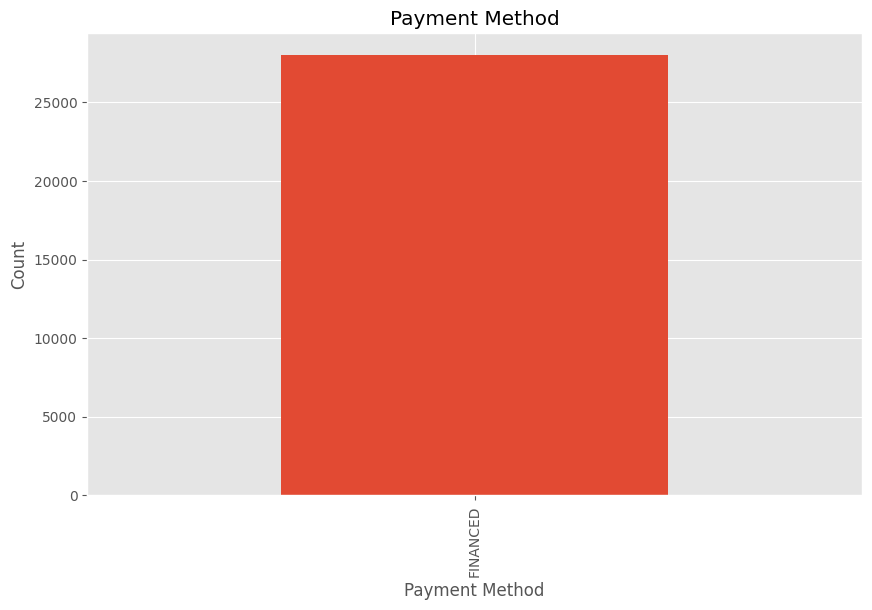

In [14]:
# Most common payment method
plt.style.use('ggplot')
train['PaymentMethod'].value_counts().plot(kind='bar', title='Payment Method', figsize=(10, 6))
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show();

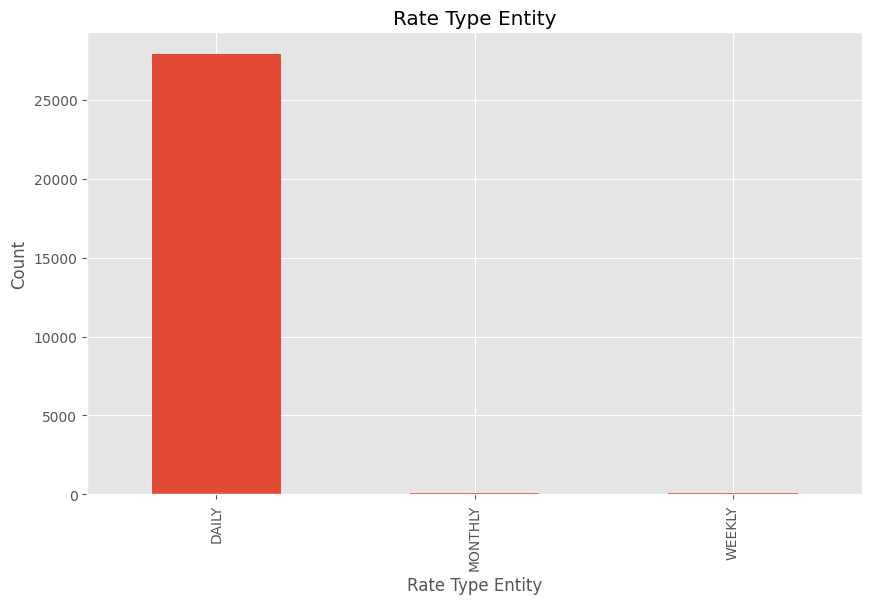

In [29]:
# Rate Type Entity count
train['rateTypeEntity'].value_counts().plot(kind='bar', title='Rate Type Entity', figsize=(10, 6))
plt.xlabel('Rate Type Entity')
plt.ylabel('Count')
plt.show();

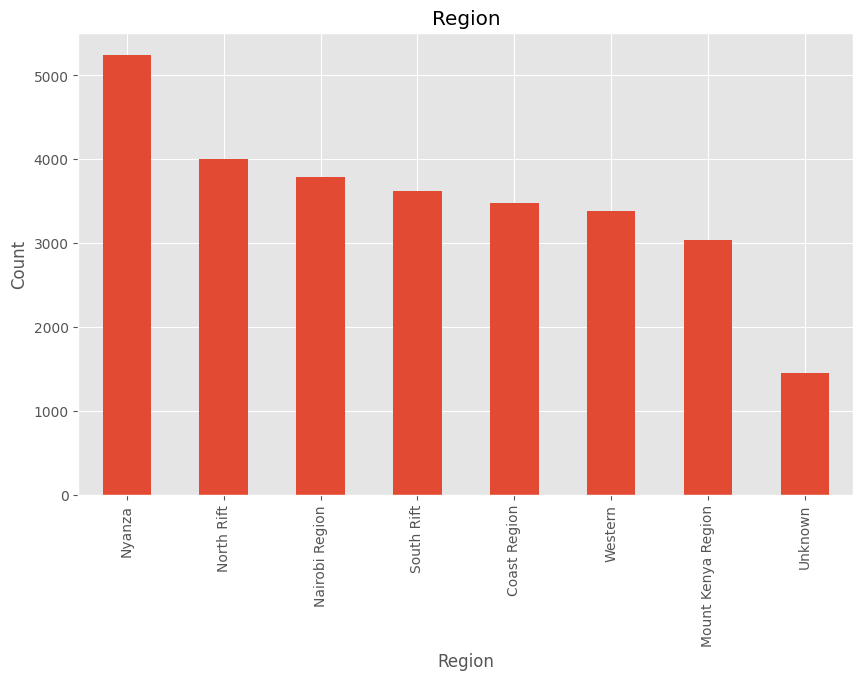

In [30]:
# Which region has the most customers?
train['Region'].value_counts().plot(kind='bar', title='Region', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Count')
plt.show();

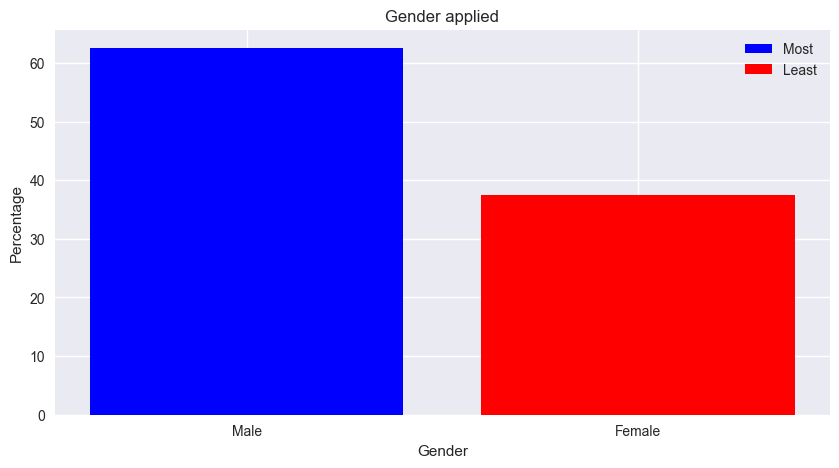

In [82]:
# Change gender column name
train.rename(columns={'MainApplicantGender': 'Gender'}, inplace=True)

# Which gender applied most
gender_applied_most = train['Gender'].value_counts().idxmax()
# Which gender applied least
gender_applied_least = train['Gender'].value_counts().idxmin()
# Which gender applied most (percentage)
gender_applied_most_percentage  = train['Gender'].value_counts(normalize=True).max() * 100
# Which gender applied least (percentage)
gender_applied_least_percentage = train['Gender'].value_counts(normalize=True).min() * 100

# Plot
plt.style.use('seaborn')

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(gender_applied_most, gender_applied_most_percentage, color='blue', label='Most')
plt.bar(gender_applied_least, gender_applied_least_percentage, color='red', label='Least')

# Add title and labels
plt.title('Gender applied')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Add legend
plt.legend()

# Show plot
plt.show()

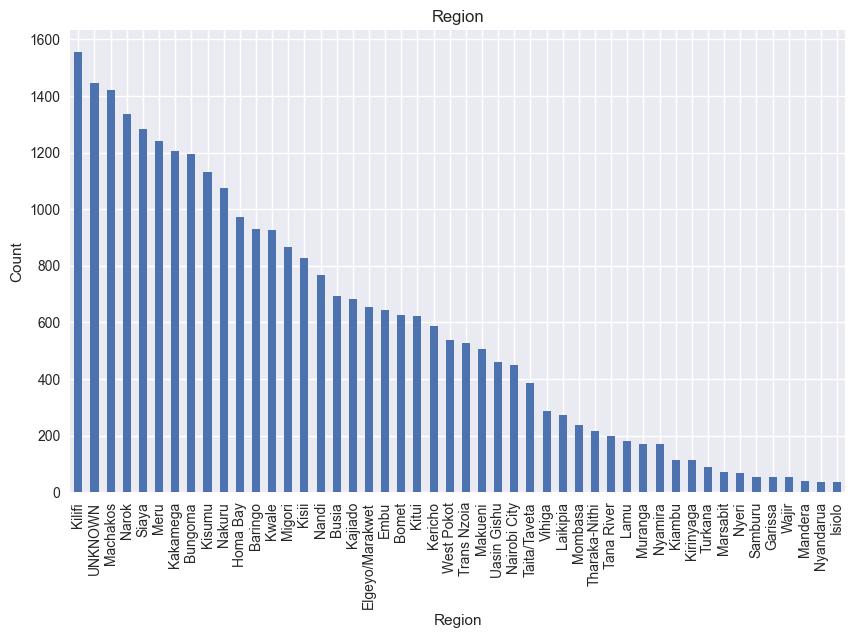

In [35]:
# Which town has the most customers?
train['Town'].value_counts().plot(kind='bar', title='Region', figsize=(10, 6))
plt.xlabel('Town')
plt.ylabel('Count')
plt.show();

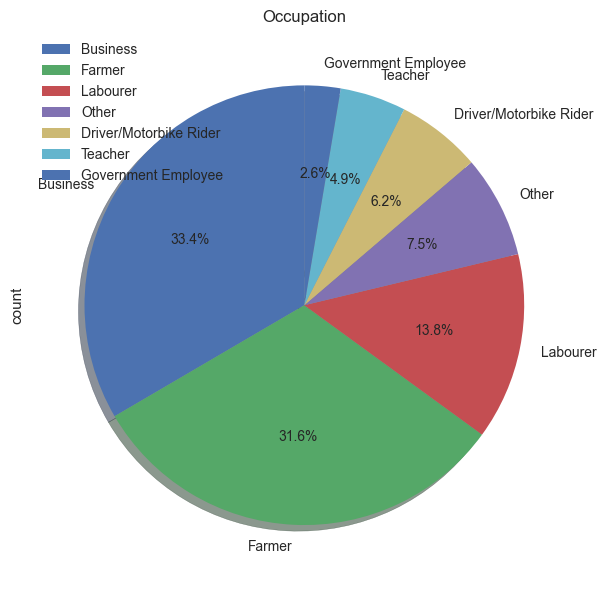

In [38]:
# Which occupation has the most customers?
train['Occupation'].value_counts().plot(kind='pie', title='Occupation', figsize=(10, 6), autopct='%1.1f%%', shadow=True, startangle=90)
plt.gca().set_aspect('equal')
plt.legend(labels=train['Occupation'].value_counts().index, loc='upper left')
plt.tight_layout()
plt.show();

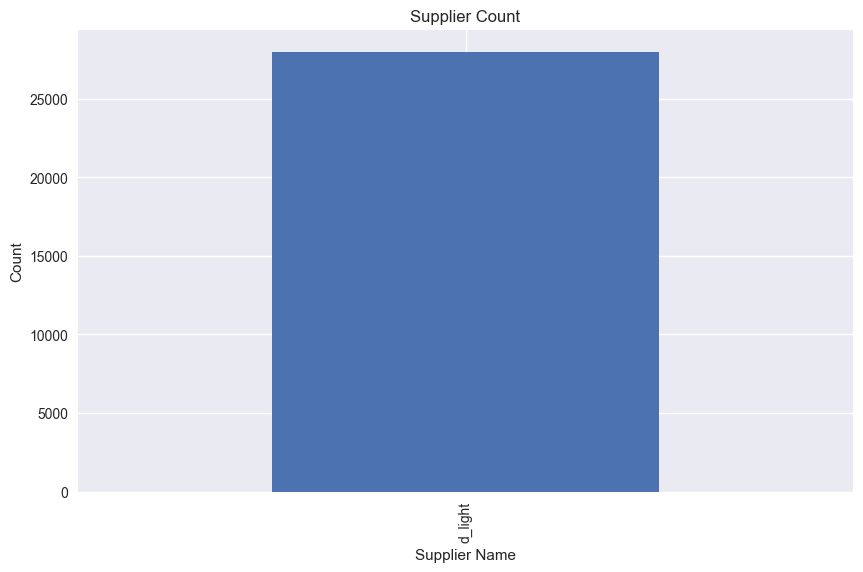

In [40]:
# Supplier count
train['SupplierName'].value_counts().plot(kind='bar', title='Supplier Count', figsize=(10, 6))
plt.xlabel('Supplier Name')
plt.ylabel('Count')
plt.show();

In [41]:
# Average age of customers
train['Age'].mean()

38.92438447384561

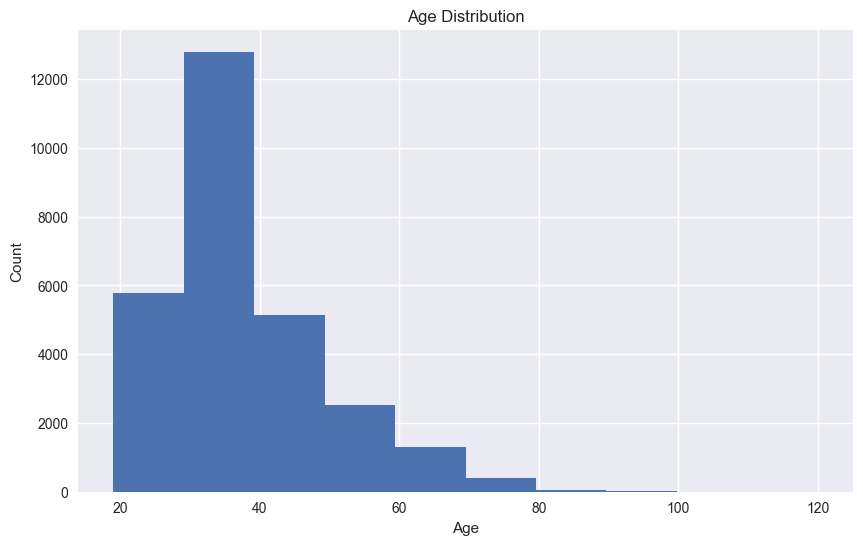

In [43]:
train['Age'].astype(int).plot(kind='hist', title='Age Distribution', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Density')
plt.show();

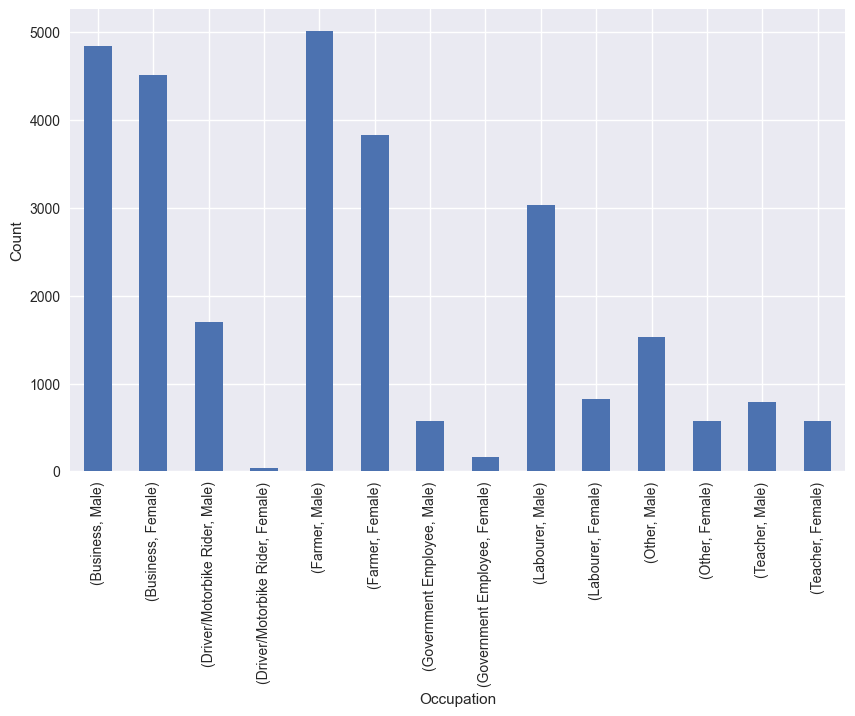

In [44]:
# Gender v Occupation
plt.figure(figsize=(10, 6))
train['Gender'].groupby(train['Occupation']).value_counts().plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show();


<BarContainer object of 7 artists>

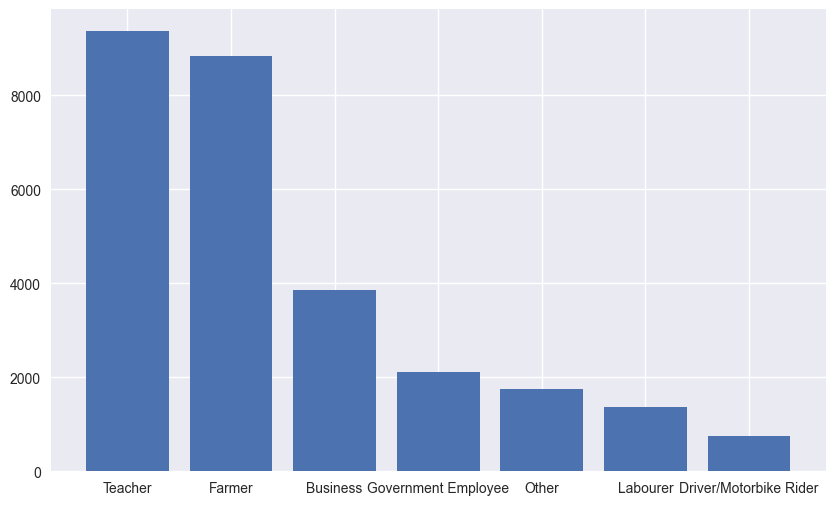

In [46]:
plt.figure(figsize=(10, 6))

x = train['Occupation'].unique()
y = train['Occupation'].value_counts()

plt.bar(x, y)

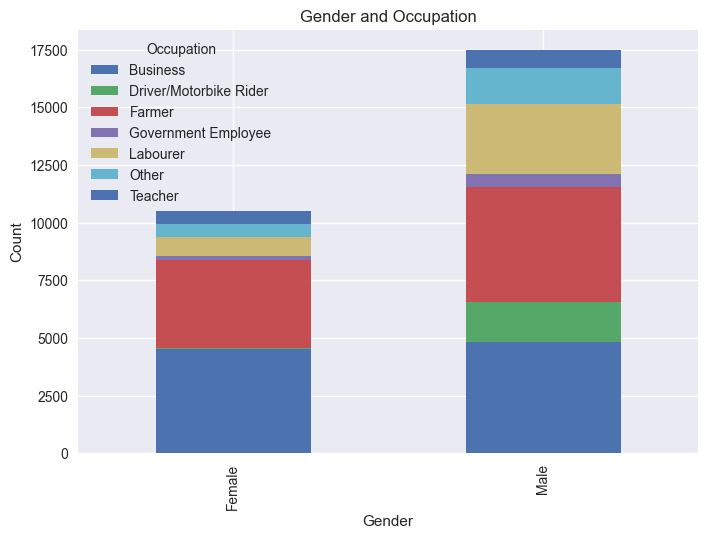

In [47]:
# Plot a stacked bar chart of gender and occupation
# Group data by gender and occupation
grouped = train.groupby(['Gender', 'Occupation']).size().unstack()

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender and Occupation')

# Show the plot
plt.show();

In [83]:
# ExpectedTermDate	FirstPaymentDate	LastPaymentDate
# Convert to datetime

# ExpectedTermDate
train['ExpectedTermDate'] = pd.to_datetime(train['ExpectedTermDate'])
test['ExpectedTermDate'] = pd.to_datetime(test['ExpectedTermDate'])

# FirstPaymentDate
train['FirstPaymentDate'] = pd.to_datetime(train['FirstPaymentDate'])
test['FirstPaymentDate'] = pd.to_datetime(test['FirstPaymentDate'])

# LastPaymentDate
train['LastPaymentDate'] = pd.to_datetime(train['LastPaymentDate'])
test['LastPaymentDate'] = pd.to_datetime(test['LastPaymentDate'])

# Extract month, day and year
# ExpectedTermDate
train['ExpectedTermDate_year'] = train['ExpectedTermDate'].dt.year
train['ExpectedTermDate_month'] = train['ExpectedTermDate'].dt.month
train['ExpectedTermDate_day'] = train['ExpectedTermDate'].dt.day

 # FirstPaymentDate
train['FirstPaymentDate_year'] = train['FirstPaymentDate'].dt.year
train['FirstPaymentDate_month'] = train['FirstPaymentDate'].dt.month
train['FirstPaymentDate_day'] = train['FirstPaymentDate'].dt.day

# LastPaymentDate
train['LastPaymentDate_year'] = train['LastPaymentDate'].dt.year
train['LastPaymentDate_month'] = train['LastPaymentDate'].dt.month
train['LastPaymentDate_day'] = train['LastPaymentDate'].dt.day

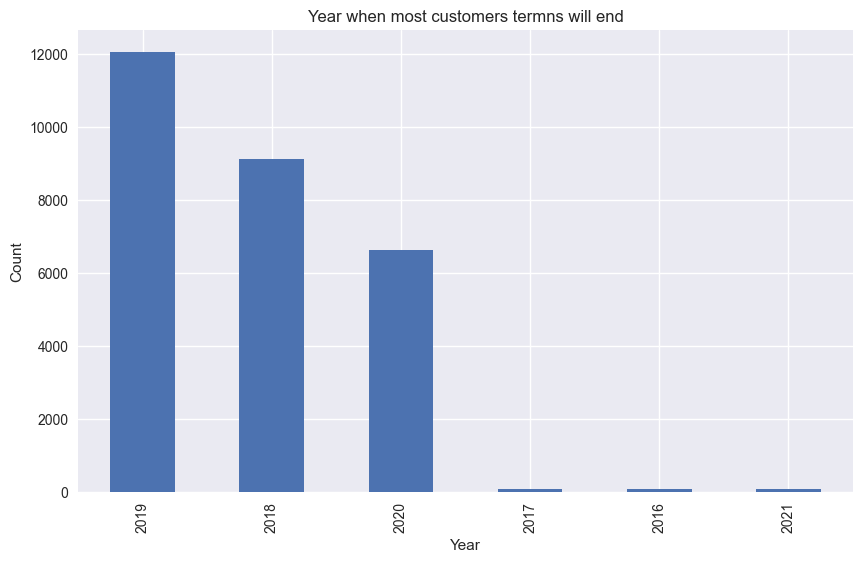

In [53]:
# Year when most customers termns will end
train['ExpectedTermDate_year'].value_counts().plot(kind='bar', title='Year when most customers termns will end', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.show();

### About
* This competition focuses on PAYGo SHS contracts data.

* When a customer applies for a loan, banks and other credit providers use statistical models to determine whether or not to grant the loan based on the likelihood of the loan being repaid. The factors involved in determining this likelihood are complex, and extensive statistical analysis and modelling are required to predict the outcome for each individual case. You must implement a similar model that predicts PAYGo SHS contract repayments or defaults based on the data provided.

* In this competition, you must explore and cleanse a dataset consisting of over ~37000 PAYGo SHS contracts to determine the best way to predict the repayment profile. You must then build a machine learning model that returns the expected future payments for n months ahead (for this competition n=6).

* You could empower your solution by predicting the contract repayment status label (a probability of being paid or not paid) as well. This could indicate whether the contract will be fully paid or defaulted.

In [84]:
# m1 to m6 our targets are the next six payments which we will predict
train['Target'] = train['m1'] + train['m2'] + train['m3'] + train['m4'] + train['m5'] + train['m6']
train.head()

,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,RegistrationDate,Deposit,...,ExpectedTermDate_year,ExpectedTermDate_month,ExpectedTermDate_day,FirstPaymentDate_year,FirstPaymentDate_month,FirstPaymentDate_day,LastPaymentDate_year,LastPaymentDate_month,LastPaymentDate_day,Target
0,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0,2015-12-10 00:00:00,2000,...,2016,12,8,2015,12,10,2016,10,23,3625.0
1,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0,2015-12-09 00:00:00,2000,...,2016,12,7,2015,12,9,2020,5,24,5060.0
2,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0,2015-12-18 00:00:00,2000,...,2017,1,13,2015,12,18,2017,2,1,7650.0
3,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0,2015-11-25 00:00:00,2000,...,2016,11,23,2015,11,25,2017,5,22,5300.0
4,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0,2015-12-02 00:00:00,2000,...,2016,11,30,2015,12,5,2017,5,12,1710.0


<Axes: title={'center': 'Target Distribution'}, ylabel='Frequency'>

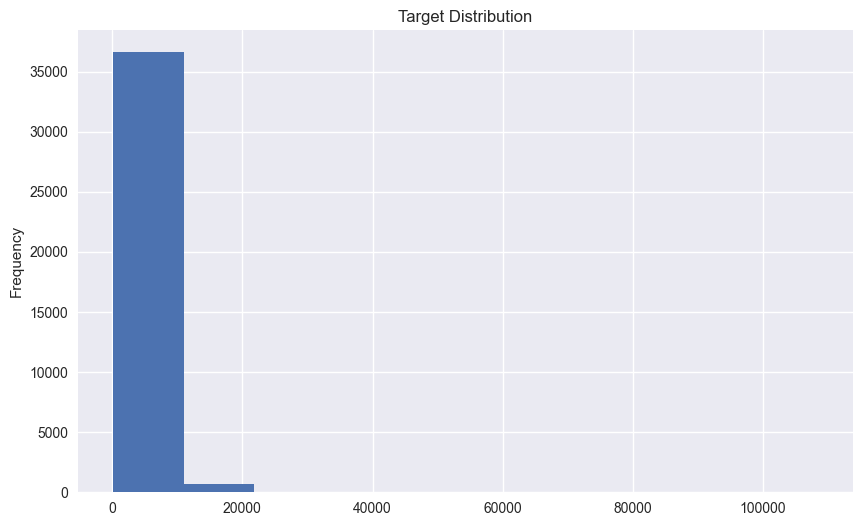

In [59]:
# Plot histogram
train['Target'].plot(kind='hist', title='Target Distribution', figsize=(10, 6))

<Axes: title={'center': 'Target Distribution'}, ylabel='Frequency'>

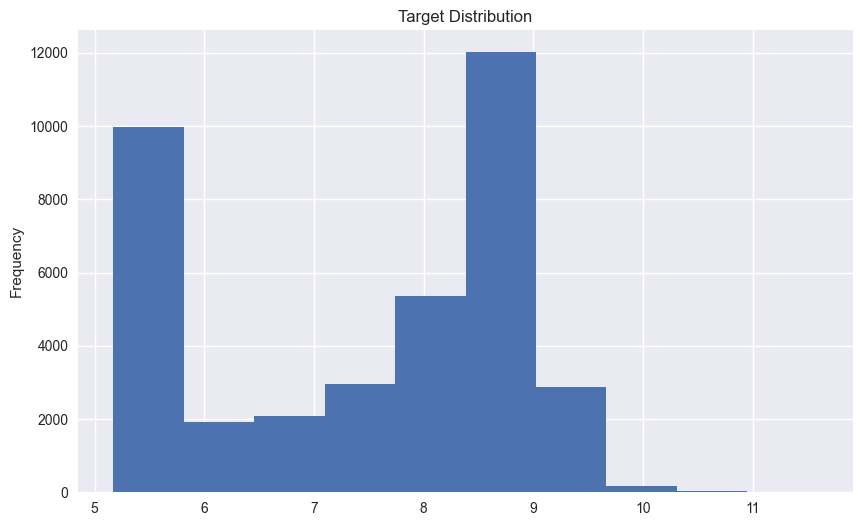

In [85]:
# Use sklearn log transformation
train['Target'] = np.log1p(train['Target'])
# Plot histogram
train['Target'].plot(kind='hist', title='Target Distribution', figsize=(10, 6))

<Axes: >

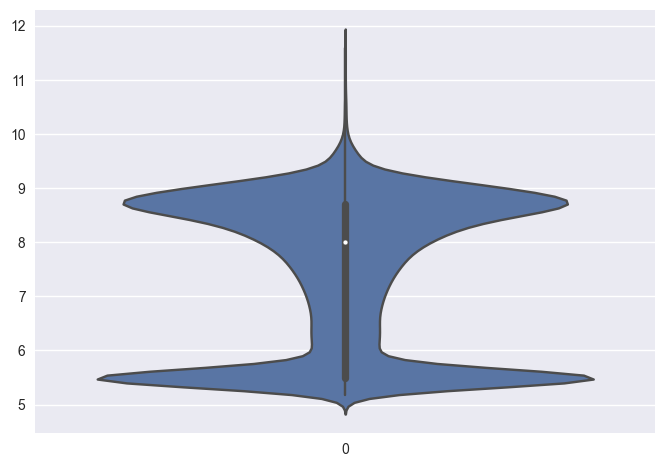

In [86]:
# Violin plot
sns.violinplot(train['Target'])

<Axes: >

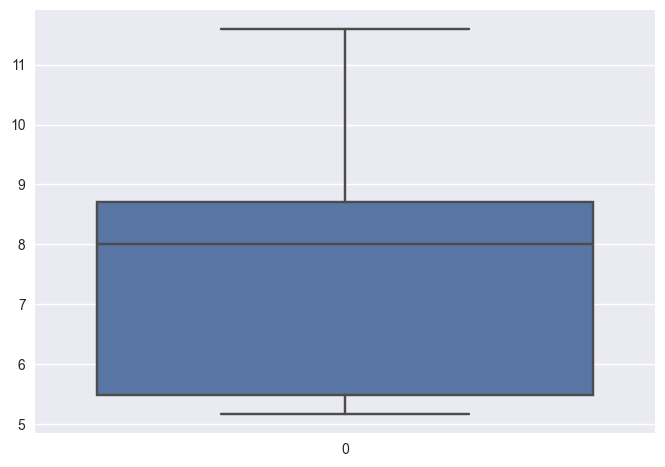

In [87]:
# Boxplot
sns.boxplot(train['Target'])

<Axes: xlabel='Target', ylabel='Density'>

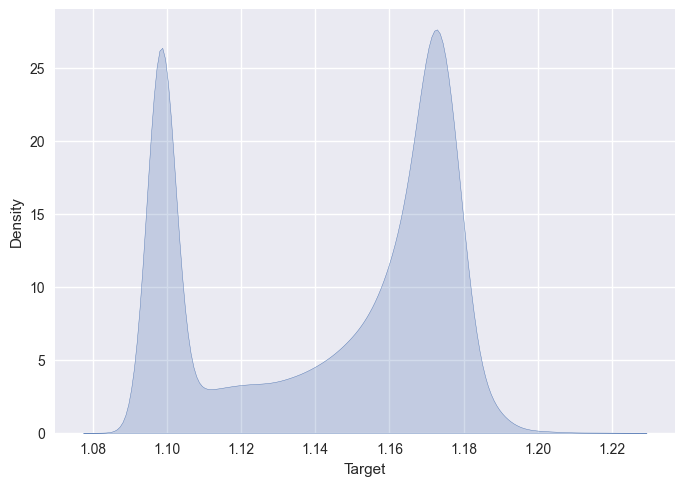

In [65]:
# kde plot
sns.kdeplot(train['Target'], shade=True)

# Preprocess Test dataset

In [88]:
# Extract month, day and year
# ExpectedTermDate
# Convert it to datetime
#test['ExpectedTermDate'] = pd.to_datetime(test['ExpectedTermDate'])

# Extract month, day and year
test['ExpectedTermDate_month'] = test['ExpectedTermDate'].dt.month
test['ExpectedTermDate_day'] = test['ExpectedTermDate'].dt.day
test['ExpectedTermDate_year'] = test['ExpectedTermDate'].dt.year

# FirstPaymentDate
# Convert it to datetime
#test['FirstPaymentDate'] = pd.to_datetime(test['FirstPaymentDate'])

# Extract month, day and year
test['FirstPaymentDate_month'] = test['FirstPaymentDate'].dt.month
test['FirstPaymentDate_day'] = test['FirstPaymentDate'].dt.day
test['FirstPaymentDate_year'] = test['FirstPaymentDate'].dt.year

# LastPaymentDate
# Convert it to datetime
#test['LastPaymentDate'] = pd.to_datetime(test['LastPaymentDate'])

# Extract month, day and year
test['LastPaymentDate_month'] = test['LastPaymentDate'].dt.month
test['LastPaymentDate_day'] = test['LastPaymentDate'].dt.day
test['LastPaymentDate_year'] = test['LastPaymentDate'].dt.year

# Renam gender column
test.rename(columns={'MainApplicantGender':'Gender'}, inplace=True)

test.head()


,ID,TransactionDates,PaymentsHistory,RegistrationDate,Deposit,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,...,LastPaymentDate,ExpectedTermDate_month,ExpectedTermDate_day,ExpectedTermDate_year,FirstPaymentDate_month,FirstPaymentDate_day,FirstPaymentDate_year,LastPaymentDate_month,LastPaymentDate_day,LastPaymentDate_year
0,ID_6L67PAA,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",2015-12-10 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,2016-10-23 04:52:30,12,8,2016,12,10,2015,10,23,2016
1,ID_VJ80SX2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...",2015-12-09 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,2020-05-24 15:32:18,12,7,2016,12,9,2015,5,24,2020
2,ID_7OU9HLK,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87...",2015-12-18 00:00:00,2000,35.0,FINANCED,DAILY,35,7,...,2017-02-01 15:23:44,1,13,2017,12,18,2015,2,1,2017
3,ID_WVWTPGK,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,...",2015-11-25 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,2017-05-22 16:46:54,11,23,2016,11,25,2015,5,22,2017
4,ID_04DSDQS,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1...",2015-12-02 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,2017-05-12 16:50:52,11,30,2016,12,5,2015,5,12,2017


In [89]:
# Drop date columns
train.drop(['ExpectedTermDate', 'FirstPaymentDate', 'LastPaymentDate'], axis=1, inplace=True)
test.drop(['ExpectedTermDate', 'FirstPaymentDate', 'LastPaymentDate'], axis=1, inplace=True)

# Drop initial target columns
train.drop(['m1', 'm2', 'm3', 'm4', 'm5', 'm6'], axis=1, inplace=True)

In [90]:
train.shape, test.shape

((37343, 27), (37343, 27))

<Axes: >

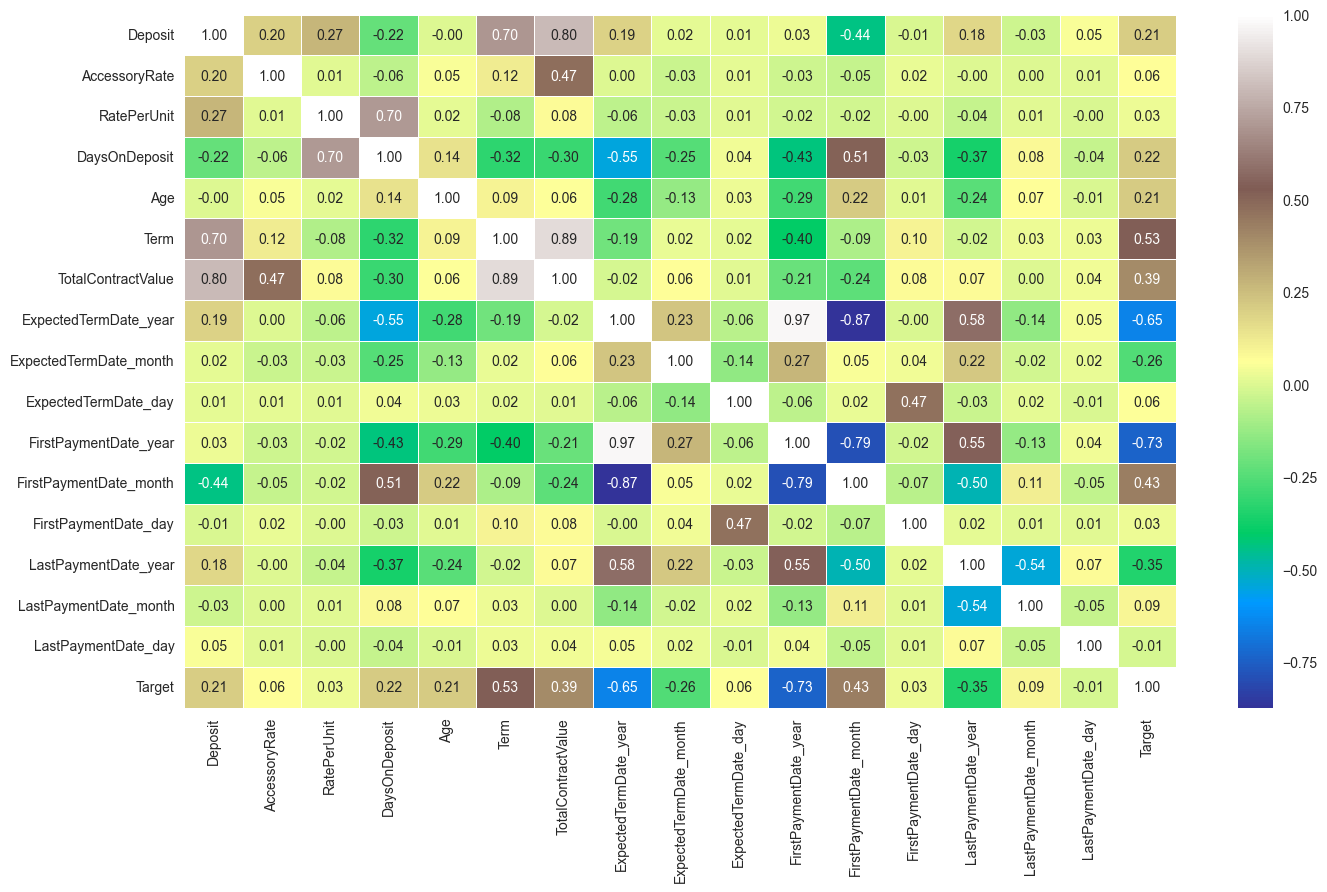

In [91]:
# Correlation matrix
corr = train.select_dtypes('number').corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr, cmap='terrain', annot=True, fmt=".2f", linewidths=0.5)

In [92]:
# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
Term                      0.534475
FirstPaymentDate_month    0.431848
TotalContractValue        0.394578
DaysOnDeposit             0.216171
Age                       0.210619
Deposit                   0.207279
LastPaymentDate_month     0.086781
AccessoryRate             0.063904
ExpectedTermDate_day      0.060466
RatePerUnit               0.033601
FirstPaymentDate_day      0.032026
LastPaymentDate_day      -0.013064
ExpectedTermDate_month   -0.257381
LastPaymentDate_year     -0.346339
ExpectedTermDate_year    -0.649905
FirstPaymentDate_year    -0.734541
Name: Target, dtype: float64

In [93]:
# We can increase the correlation between target and other features by taking the log of the features
# Log transform
train['Age'] = np.log(train['Age'])
train['Deposit'] = np.log(train['Deposit'])
train['ExpectedTermDate_year'] = np.log(train['ExpectedTermDate_year'])
train['FirstPaymentDate_year'] = np.log(train['FirstPaymentDate_year'])
train['FirstPaymentDate_month'] = np.log(train['FirstPaymentDate_month'])
train['FirstPaymentDate_day'] = np.log(train['FirstPaymentDate_day'])
train['LastPaymentDate_year'] = np.log(train['LastPaymentDate_year'])
train['LastPaymentDate_month'] = np.log(train['LastPaymentDate_month'])
train['RatePerUnit'] = np.log(train['RatePerUnit'])
train['TotalContractValue'] = np.log(train['TotalContractValue'])
train['Target'] = np.log(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
Term                      0.551685
FirstPaymentDate_month    0.534444
TotalContractValue        0.474589
Age                       0.250332
DaysOnDeposit             0.222808
Deposit                   0.202269
RatePerUnit               0.111596
LastPaymentDate_month     0.099737
AccessoryRate             0.065380
ExpectedTermDate_day      0.061901
FirstPaymentDate_day      0.022006
LastPaymentDate_day      -0.013600
ExpectedTermDate_month   -0.265487
LastPaymentDate_year     -0.356976
ExpectedTermDate_year    -0.669948
FirstPaymentDate_year    -0.757374
Name: Target, dtype: float64

In [96]:
# We can also increase correlation by taking the square root of the features
# Square root transform
train['Age'] = np.sqrt(train['Age'])
train['Deposit'] = np.sqrt(train['Deposit'])
train['Term'] = np.sqrt(train['Term'])
train['ExpectedTermDate_year'] = np.sqrt(train['ExpectedTermDate_year'])
train['FirstPaymentDate_year'] = np.sqrt(train['FirstPaymentDate_year'])
train['Target'] = np.sqrt(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
FirstPaymentDate_month    0.531901
TotalContractValue        0.472228
Age                       0.244025
DaysOnDeposit             0.221751
Deposit                   0.169234
RatePerUnit               0.110988
LastPaymentDate_month     0.099201
AccessoryRate             0.065146
ExpectedTermDate_day      0.061675
FirstPaymentDate_day      0.021889
Term                      0.007420
LastPaymentDate_day      -0.013510
ExpectedTermDate_month   -0.264196
LastPaymentDate_year     -0.355274
ExpectedTermDate_year    -0.666732
FirstPaymentDate_year    -0.753714
Name: Target, dtype: float64

In [95]:
# We can also go ahead and increase correlation by taking the cube root of the features
# Cube root transform
train['Age'] = np.cbrt(train['Age'])
train['Deposit'] = np.cbrt(train['Deposit'])
train['Term'] = np.cbrt(train['Term'])
train['Target'] = np.cbrt(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
FirstPaymentDate_month    0.529312
TotalContractValue        0.469825
Age                       0.237564
DaysOnDeposit             0.220674
Deposit                   0.199190
RatePerUnit               0.110369
LastPaymentDate_month     0.098657
AccessoryRate             0.064907
ExpectedTermDate_day      0.061444
FirstPaymentDate_day      0.021769
Term                      0.007011
LastPaymentDate_day      -0.013420
ExpectedTermDate_month   -0.262880
LastPaymentDate_year     -0.353541
ExpectedTermDate_year    -0.663468
FirstPaymentDate_year    -0.749998
Name: Target, dtype: float64

In [94]:
# We can also increase correlation by taking the exponential of the features
# Exponential transform
train['Age'] = np.exp(train['Age'])
train['Deposit'] = np.exp(train['Deposit'])
train['Term'] = np.exp(train['Term'])
train['Target'] = np.exp(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
FirstPaymentDate_month    0.518509
TotalContractValue        0.459812
DaysOnDeposit             0.216171
Age                       0.210619
Deposit                   0.207279
RatePerUnit               0.107794
LastPaymentDate_month     0.096403
AccessoryRate             0.063904
ExpectedTermDate_day      0.060466
FirstPaymentDate_day      0.021254
Term                      0.000000
LastPaymentDate_day      -0.013064
ExpectedTermDate_month   -0.257381
LastPaymentDate_year     -0.346318
ExpectedTermDate_year    -0.649821
FirstPaymentDate_year    -0.734472
Name: Target, dtype: float64

In [97]:
# Another way is by taking the square of the features
# Square transform
train['Age'] = np.square(train['Age'])
train['Deposit'] = np.square(train['Deposit'])
train['Term'] = np.square(train['Term'])
train['Target'] = np.square(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
FirstPaymentDate_month    0.529312
TotalContractValue        0.469825
Age                       0.237564
DaysOnDeposit             0.220674
Deposit                   0.199190
RatePerUnit               0.110369
LastPaymentDate_month     0.098657
AccessoryRate             0.064907
ExpectedTermDate_day      0.061444
FirstPaymentDate_day      0.021769
Term                      0.007011
LastPaymentDate_day      -0.013420
ExpectedTermDate_month   -0.262880
LastPaymentDate_year     -0.353541
ExpectedTermDate_year    -0.663462
FirstPaymentDate_year    -0.749993
Name: Target, dtype: float64

In [98]:
# Inverse 
# Inverse transform
train['Age'] = 1/train['Age']
train['Deposit'] = 1/train['Deposit']
train['Term'] = 1/train['Term']
train['Target'] = 1/train['Target']

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
FirstPaymentDate_year     0.764474
ExpectedTermDate_year     0.676183
LastPaymentDate_year      0.360288
ExpectedTermDate_month    0.267997
Age                       0.262414
Deposit                   0.201427
LastPaymentDate_day       0.013780
FirstPaymentDate_day     -0.022231
Term                     -0.025385
ExpectedTermDate_day     -0.062338
AccessoryRate            -0.065833
LastPaymentDate_month    -0.100783
RatePerUnit              -0.112780
DaysOnDeposit            -0.224862
TotalContractValue       -0.479183
FirstPaymentDate_month   -0.539389
Name: Target, dtype: float64

In [95]:
# Inverse square
# Inverse square transform
train['Age'] = 1/(train['Age']**2)
train['Deposit'] = 1/(train['Deposit']**2)
train['Term'] = 1/(train['Term']**2)
train['Target'] = 1/(train['Target']**2)

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
FirstPaymentDate_month    0.517112
Term                      0.490265
TotalContractValue        0.393471
Age                       0.237616
DaysOnDeposit             0.215585
Deposit                   0.195174
LastPaymentDate_month     0.096115
AccessoryRate             0.063777
FirstPaymentDate_day      0.021180
LastPaymentDate_year     -0.345387
ExpectedTermDate_year    -0.648048
FirstPaymentDate_year    -0.732456
Name: Target, dtype: float64

In [ ]:
# To get more stronger correlation, we can;
# 1. Take the log of the features
# 2. Take the square of the features
# 3. Take the cube of the features
# 4. Take the exponential of the features
# 5. Take the square root of the features
# 6. Take the cube root of the features
# 7. Take the inverse of the features
# 8. Take the inverse of the square root of the features
# 9. Take the inverse of the cube root of the features

# Model Training

In [31]:
# Convert age to number instead of float
train['Age'] = train['Age'].astype(int)

In [72]:
# Drop columns with low correlation
train.drop(['LastPaymentDate_day', 'ExpectedTermDate_month', 'ExpectedTermDate_day', 'RatePerUnit'], axis=1, inplace=True)

The predicted values are: [0.49678274 0.566315   0.50270587 ... 0.566315   0.50270587 0.50268031]
The r2 score is : 0.6594820455257977
The mean absolute error is : 0.014089853634299055
The mean squared error is : 0.0004153309298430733
The root mean squared error is : 0.020379669522420457


Text(0.5, 1.0, 'Actual vs Predicted values')

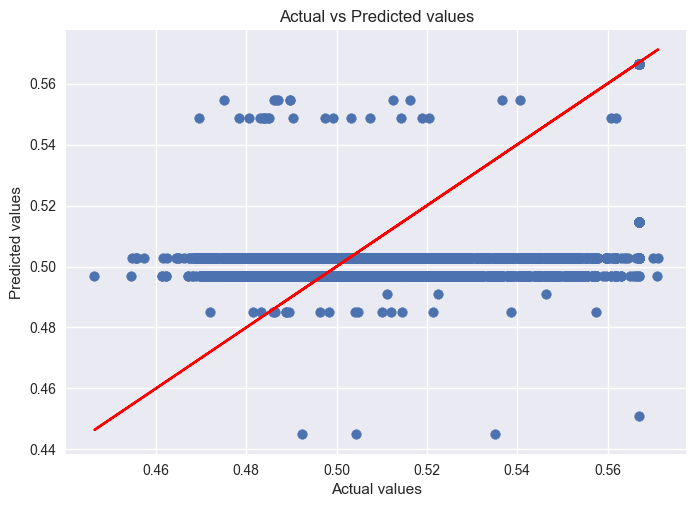

In [102]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
X = train[["FirstPaymentDate_year", "ExpectedTermDate_year", "LastPaymentDate_year"]]
y = train['Target']

# Label encode categorical variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
lr_y_pred = lr.predict(X_test)
print(f'The predicted values are: {lr_y_pred}')

# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print(f'The r2 score is : {r2_score(y_test, lr_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, lr_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, lr_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, lr_y_pred))}')


# Visualize the model
plt.scatter(y_test, lr_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')


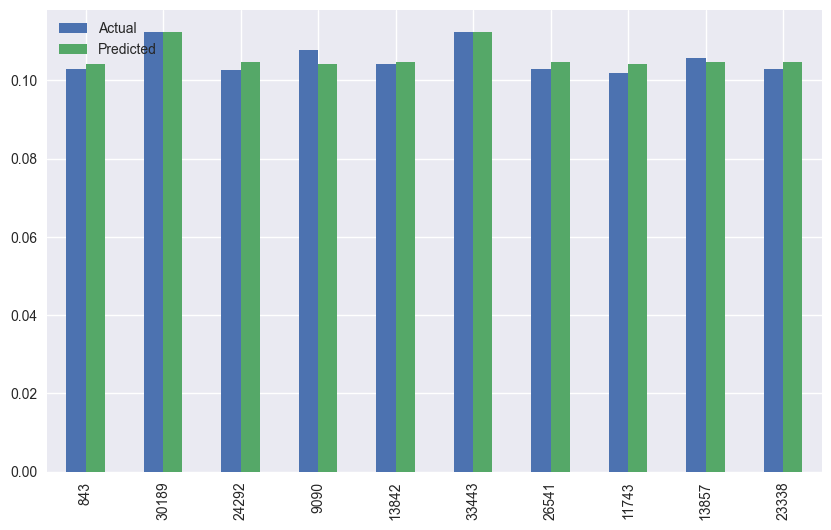

In [33]:
# Create a dataframe of the actual and predicted values
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': lr_y_pred})

# Plot the bar chart
lr_df.head(10).plot(kind='bar', figsize=(10, 6))
plt.show();

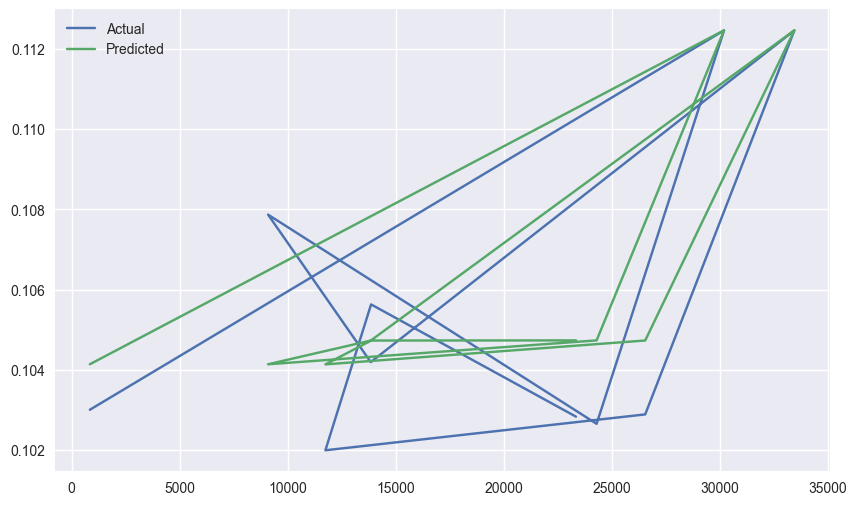

In [34]:
# Plot the line chart
lr_df.head(10).plot(kind='line', figsize=(10, 6))
plt.show();

In [35]:
train.shape, test.shape

((37343, 27), (37343, 26))

In [103]:
# Make predictions on the test set
preds = lr.predict(test[['FirstPaymentDate_year', 'ExpectedTermDate_year', 'LastPaymentDate_year']])
preds

array([51.85892849, 51.85903513, 51.81886634, ..., 51.98642974,
       52.02651855, 52.02651855])

In [104]:
preds.shape

(37343,)

In [105]:
sample_sub = pd.read_csv('SampleSubmission.csv')
sample_sub.head()

,ID,Target
0,ID_6L67PAA x m1,0.0
1,ID_6L67PAA x m2,0.0
2,ID_6L67PAA x m3,0.0
3,ID_6L67PAA x m4,0.0
4,ID_6L67PAA x m5,0.0


In [39]:
sample_sub.shape

(56016, 2)

In [43]:
sample_sub.tail()

,ID,Target
56011,ID_WKQPWF3 x m2,0.0
56012,ID_WKQPWF3 x m3,0.0
56013,ID_WKQPWF3 x m4,0.0
56014,ID_WKQPWF3 x m5,0.0
56015,ID_WKQPWF3 x m6,0.0


In [106]:
test.head()

,ID,TransactionDates,PaymentsHistory,RegistrationDate,Deposit,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,...,TotalContractValue,ExpectedTermDate_month,ExpectedTermDate_day,ExpectedTermDate_year,FirstPaymentDate_month,FirstPaymentDate_day,FirstPaymentDate_year,LastPaymentDate_month,LastPaymentDate_day,LastPaymentDate_year
0,ID_6L67PAA,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",2015-12-10 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,14740.0,12,8,2016,12,10,2015,10,23,2016
1,ID_VJ80SX2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...",2015-12-09 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,14740.0,12,7,2016,12,9,2015,5,24,2020
2,ID_7OU9HLK,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87...",2015-12-18 00:00:00,2000,35.0,FINANCED,DAILY,35,7,...,29480.0,1,13,2017,12,18,2015,2,1,2017
3,ID_WVWTPGK,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,...",2015-11-25 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,14740.0,11,23,2016,11,25,2015,5,22,2017
4,ID_04DSDQS,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1...",2015-12-02 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,14740.0,11,30,2016,12,5,2015,5,12,2017


In [110]:
test['ID'].shape

(37343,)

In [112]:
# Create a list of the IDs
ids = list(test['ID'])

# Create a list of the months
months = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']

# Create a list of the IDs x months
new_ids = []
for i in ids:
    for j in months:
        new_ids.append(i + ' x ' + j)
        
# Slice the new_ids list to match the length of the test dataframe

new_ids = new_ids[:len(test)]

# Create a new column in the test dataframe called ID_months
test['ID_months'] = new_ids

# Check the head of the test dataframe
test.head()


,ID,TransactionDates,PaymentsHistory,RegistrationDate,Deposit,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,...,LastPaymentDate_month,LastPaymentDate_day,LastPaymentDate_year,ID x m1,ID x m2,ID x m3,ID x m4,ID x m5,ID x m6,ID_months
0,ID_6L67PAA x m1,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",2015-12-10 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,10,23,2016,ID x m1_6L67PAA x m1,ID x m2_6L67PAA x m1,ID x m3_6L67PAA x m1,ID x m4_6L67PAA x m1,ID x m5_6L67PAA x m1,ID x m6_6L67PAA x m1,ID_6L67PAA x m1 x m1
1,ID_VJ80SX2 x m2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...",2015-12-09 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,5,24,2020,ID x m1_VJ80SX2 x m2,ID x m2_VJ80SX2 x m2,ID x m3_VJ80SX2 x m2,ID x m4_VJ80SX2 x m2,ID x m5_VJ80SX2 x m2,ID x m6_VJ80SX2 x m2,ID_6L67PAA x m1 x m2
2,ID_7OU9HLK x m3,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87...",2015-12-18 00:00:00,2000,35.0,FINANCED,DAILY,35,7,...,2,1,2017,ID x m1_7OU9HLK x m3,ID x m2_7OU9HLK x m3,ID x m3_7OU9HLK x m3,ID x m4_7OU9HLK x m3,ID x m5_7OU9HLK x m3,ID x m6_7OU9HLK x m3,ID_6L67PAA x m1 x m3
3,ID_WVWTPGK x m4,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,...",2015-11-25 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,5,22,2017,ID x m1_WVWTPGK x m4,ID x m2_WVWTPGK x m4,ID x m3_WVWTPGK x m4,ID x m4_WVWTPGK x m4,ID x m5_WVWTPGK x m4,ID x m6_WVWTPGK x m4,ID_6L67PAA x m1 x m4
4,ID_04DSDQS x m5,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1...",2015-12-02 00:00:00,2000,0.0,FINANCED,DAILY,35,7,...,5,12,2017,ID x m1_04DSDQS x m5,ID x m2_04DSDQS x m5,ID x m3_04DSDQS x m5,ID x m4_04DSDQS x m5,ID x m5_04DSDQS x m5,ID x m6_04DSDQS x m5,ID_6L67PAA x m1 x m5


In [62]:
# Create a dataframe of the predictions
preds_df = pd.DataFrame({'Target': preds})
preds_df.head()

# Concatenate the ID and predictions dataframes
submission_df = pd.concat([id_df, preds_df], axis=1)

In [63]:
# Rename the columns
submission_df.columns = sample_sub.columns
submission_df.head()

,ID,Target
0,ID_6L67PAA x m1,7.563109e+06
1,ID_6L67PAA x m2,5.457877e+06
2,ID_6L67PAA x m3,3.756803e+06
3,ID_6L67PAA x m4,8.096053e+06
4,ID_6L67PAA x m5,8.160643e+06


In [64]:
submission_df.tail(10)

,ID,Target
336086,ID_HYHB585 x m3,NaN
336087,ID_HYHB585 x m4,NaN
336088,ID_HYHB585 x m5,NaN
336089,ID_HYHB585 x m6,NaN
336090,ID_WKQPWF3 x m1,NaN
336091,ID_WKQPWF3 x m2,NaN
336092,ID_WKQPWF3 x m3,NaN
336093,ID_WKQPWF3 x m4,NaN
336094,ID_WKQPWF3 x m5,NaN
336095,ID_WKQPWF3 x m6,NaN


In [69]:
# The submission file should have 37343 rows
submission_df.shape

(336096, 2)

In [65]:
# To csv
submission_df.to_csv('submission.csv', index=False)

The predicted values are: [0.05888185 0.07024565 0.05925661 ... 0.07024565 0.05925661 0.05925661]
The r2 score is : 0.6769827083661293
The mean absolute error is : 0.0022656458659650056
The mean squared error is : 1.0924846885699168e-05
The root mean squared error is : 0.0033052756141809365


Text(0.5, 1.0, 'Actual vs Predicted values')

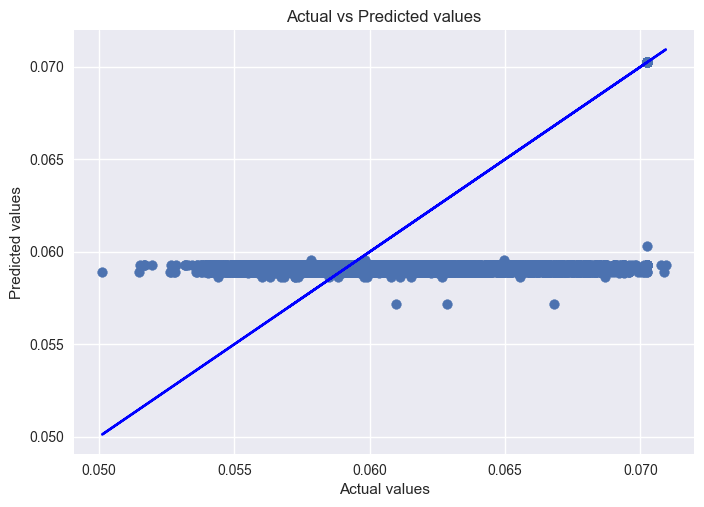

In [90]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb.predict(X_test)
print(f'The predicted values are: {xgb_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, xgb_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, xgb_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, xgb_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, xgb_y_pred))}')

# Visualize the model
plt.scatter(y_test, xgb_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'b')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')


The predicted values are: [17.04503648 14.2340343  17.01921051 ... 14.2340343  17.11870504
 16.91323702]
The r2 score is : 0.6330978889610475
The mean absolute error is : 0.6155776747423913
The mean squared error is : 0.7973136058989342
The root mean squared error is : 0.8929241882147297


Text(0.5, 1.0, 'Actual vs Predicted values')

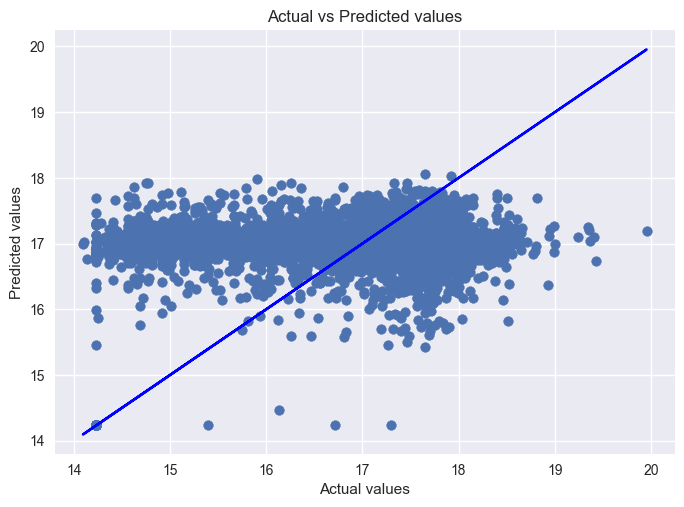

In [87]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf.predict(X_test)
print(f'The predicted values are: {rf_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, rf_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, rf_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, rf_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, rf_y_pred))}')

# Visualize the model
plt.scatter(y_test, rf_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'b')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')